In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor

In [2]:
df = pd.read_csv("car_price_prediction_.csv")
df

,Car ID,Brand,Year,Engine Size,Fuel Type,Transmission,Mileage,Condition,Price
0,1,Tesla,2016,2.3,Petrol,Manual,114832,New,26613.92
1,2,BMW,2018,4.4,Electric,Manual,143190,Used,14679.61
2,3,Audi,2013,4.5,Electric,Manual,181601,New,44402.61
3,4,Tesla,2011,4.1,Diesel,Automatic,68682,New,86374.33
4,5,Ford,2009,2.6,Diesel,Manual,223009,Like New,73577.10
5,6,Audi,2019,2.4,Diesel,Automatic,246553,Like New,88969.76
6,7,Audi,2020,4.0,Electric,Automatic,135486,Used,63498.75
7,8,Tesla,2017,5.3,Hybrid,Automatic,83030,New,17381.19
8,9,Honda,2023,5.7,Electric,Manual,120360,Like New,15905.62
9,10,Ford,2010,1.5,Electric,Automatic,135009,Like New,9560.22


In [3]:
df['Brand'].value_counts()

Audi        7
BMW         6
Ford        5
Tesla       4
Honda       4
Mercedes    4
Toyota      3
Name: Brand, dtype: int64

In [4]:
df['Fuel Type'].value_counts()

Electric    15
Diesel       8
Petrol       5
Hybrid       5
Name: Fuel Type, dtype: int64

In [5]:
df['Transmission'].value_counts()

Automatic    23
Manual       10
Name: Transmission, dtype: int64

In [6]:
df['Condition'].value_counts()

New         13
Used        12
Like New     8
Name: Condition, dtype: int64

In [7]:
X = df.iloc[:,:-1]
X

,Car ID,Brand,Year,Engine Size,Fuel Type,Transmission,Mileage,Condition
0,1,Tesla,2016,2.3,Petrol,Manual,114832,New
1,2,BMW,2018,4.4,Electric,Manual,143190,Used
2,3,Audi,2013,4.5,Electric,Manual,181601,New
3,4,Tesla,2011,4.1,Diesel,Automatic,68682,New
4,5,Ford,2009,2.6,Diesel,Manual,223009,Like New
5,6,Audi,2019,2.4,Diesel,Automatic,246553,Like New
6,7,Audi,2020,4.0,Electric,Automatic,135486,Used
7,8,Tesla,2017,5.3,Hybrid,Automatic,83030,New
8,9,Honda,2023,5.7,Electric,Manual,120360,Like New
9,10,Ford,2010,1.5,Electric,Automatic,135009,Like New


In [8]:
y= df.iloc[:,-1]
y

0     26613.92
1     14679.61
2     44402.61
3     86374.33
4     73577.10
5     88969.76
6     63498.75
7     17381.19
8     15905.62
9      9560.22
10    58872.60
11    28074.19
12    74766.45
13    70193.74
14    35220.52
15    21796.16
16    14728.03
17    75044.95
18    47791.89
19    35735.34
20    86382.04
21    61393.26
22    54210.22
23    75621.02
24    82480.40
25    70176.95
26    46800.60
27    41033.39
28    78308.17
29    54201.18
30    71916.68
31    89587.88
32    92009.61
Name: Price, dtype: float64

# Xu ly du lieu


In [9]:
X=pd.get_dummies(X,dtype=int)
X.head(10)

,Car ID,Year,Engine Size,Mileage,Brand_Audi,Brand_BMW,Brand_Ford,Brand_Honda,Brand_Mercedes,Brand_Tesla,Brand_Toyota,Fuel Type_Diesel,Fuel Type_Electric,Fuel Type_Hybrid,Fuel Type_Petrol,Transmission_Automatic,Transmission_Manual,Condition_Like New,Condition_New,Condition_Used
0,1,2016,2.3,114832,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0
1,2,2018,4.4,143190,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1
2,3,2013,4.5,181601,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0
3,4,2011,4.1,68682,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0
4,5,2009,2.6,223009,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0
5,6,2019,2.4,246553,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0
6,7,2020,4.0,135486,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1
7,8,2017,5.3,83030,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0
8,9,2023,5.7,120360,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0
9,10,2010,1.5,135009,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Car ID        33 non-null     int64  
 1   Brand         33 non-null     object 
 2   Year          33 non-null     int64  
 3   Engine Size   33 non-null     float64
 4   Fuel Type     33 non-null     object 
 5   Transmission  33 non-null     object 
 6   Mileage       33 non-null     int64  
 7   Condition     33 non-null     object 
 8   Price         33 non-null     float64
dtypes: float64(2), int64(3), object(4)
memory usage: 2.4+ KB


# TH1 thực hành với dữ liệu chưa chuẩn hóa



In [11]:
from sklearn.preprocessing import MinMaxScaler

In [12]:
scaler=MinMaxScaler()
X["Mileage"]=scaler.fit_transform(X[["Mileage"]])
X

,Car ID,Year,Engine Size,Mileage,Brand_Audi,Brand_BMW,Brand_Ford,Brand_Honda,Brand_Mercedes,Brand_Tesla,Brand_Toyota,Fuel Type_Diesel,Fuel Type_Electric,Fuel Type_Hybrid,Fuel Type_Petrol,Transmission_Automatic,Transmission_Manual,Condition_Like New,Condition_New,Condition_Used
0,1,2016,2.3,0.358120,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0
1,2,2018,4.4,0.457023,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1
2,3,2013,4.5,0.590988,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0
3,4,2011,4.1,0.197165,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0
4,5,2009,2.6,0.735405,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0
5,6,2019,2.4,0.817519,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0
6,7,2020,4.0,0.430154,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1
7,8,2017,5.3,0.247206,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0
8,9,2023,5.7,0.377400,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0
9,10,2010,1.5,0.428491,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0


In [13]:
X_train,X_test, y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=4)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((23, 20), (10, 20), (23,), (10,))

# KNN regresstion


In [14]:
knn_Reg=KNeighborsRegressor(n_neighbors=9)
knn_Reg.fit(X_train,y_train)
y_pred_knn=knn_Reg.predict(X_test)
print(pd.DataFrame({"y_test":y_test,"y_predicted":y_pred_knn}).head(10))

      y_test   y_predicted
16  14728.03  52832.563333
21  61393.26  71557.223333
14  35220.52  60113.826667
31  89587.88  66895.926667
15  21796.16  55290.276667
19  35735.34  61682.146667
11  28074.19  46040.313333
2   44402.61  44062.277778
22  54210.22  64755.071111
17  75044.95  58074.788889


# Đánh giá

In [15]:
from sklearn.metrics import mean_absolute_error


In [16]:
MAE_KNN=mean_absolute_error(y_test,y_pred_knn)
print("MAE_KNN: ",MAE_KNN)

MAE_KNN:  20111.614777777773


# Linear regresstion

In [17]:
from sklearn.linear_model import LinearRegression

# HQTT đơn giản
y=b1x + b0

In [18]:
reg=LinearRegression()
reg.fit([[1],[2],[3],[4],[5],[6]],[11,11,14,16,18,20])
print(reg.coef_)
print(reg.intercept_)

[1.94285714]
8.2


# HQTT da bien
y=w1x1 + w2x2 + ... + wnxn +w0

In [19]:
Linear_Reg=LinearRegression()
Linear_Reg.fit(X_train,y_train)
y_predicted=Linear_Reg.predict(X_test)
print(pd.DataFrame({"y_test":y_test,"y_predicted":y_predicted}).head(10))

      y_test    y_predicted
16  14728.03   75449.858807
21  61393.26   25498.056679
14  35220.52   53977.284447
31  89587.88  131254.293735
15  21796.16   49108.884202
19  35735.34  104256.128354
11  28074.19   36474.784865
2   44402.61   73015.668622
22  54210.22   77692.086805
17  75044.95   68133.592240


In [20]:
w= Linear_Reg.coef_
w

array([  -605.04069552,  -1432.90736928,    860.96826729,  26484.61752604,
        13534.77228875,   -809.98993319, -19255.6854285 , -11374.90662935,
        17386.93637889, -42063.61885621,  42582.49217961,  13640.52574256,
       -18968.62663067,   3950.38819286,   1377.71269526,   8460.44836227,
        -8460.44836227, -12655.35150069,  11043.48491628,   1611.86658442])

In [21]:
Y_pred_lin=Linear_Reg.predict(X_test)
print(pd.DataFrame({"Y_test":y_test,"Y_predicted":y_predicted}).head(10))

      Y_test    Y_predicted
16  14728.03   75449.858807
21  61393.26   25498.056679
14  35220.52   53977.284447
31  89587.88  131254.293735
15  21796.16   49108.884202
19  35735.34  104256.128354
11  28074.19   36474.784865
2   44402.61   73015.668622
22  54210.22   77692.086805
17  75044.95   68133.592240


In [22]:
MAE_Linear=mean_absolute_error(y_test,Y_pred_lin)
print("MAE_Linear: ",MAE_Linear)

MAE_Linear:  32028.06009183897


# So sánh kết quả

In [23]:
import matplotlib.pyplot as plt

In [24]:
X=["MAE_KNN","MAE_Linear"]
Y=[MAE_KNN,MAE_Linear]
Y

[20111.614777777773, 32028.06009183897]

Text(0.5, 1.0, 'So sánh KNN và Linear Regression')

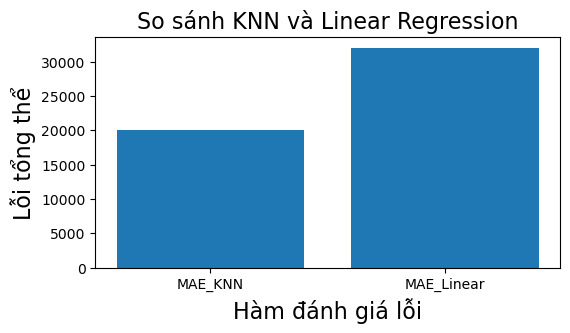

In [25]:
plt.figure(figsize=(6,3))
plt.bar(X,Y)
plt.xlabel("Hàm đánh giá lỗi",fontsize=16)
plt.ylabel("Lỗi tổng thể",fontsize=16)
plt.title("So sánh KNN và Linear Regression",fontsize=16)